In [3]:
suppressMessages(library(MuSiC))
suppressMessages(library(Seurat))
suppressMessages(library(fastSave))
suppressMessages(library(pbmcapply))
suppressMessages(library(SingleCellExperiment))

## 数据导入及bulk数据整理

In [4]:
ref_seurat<-readRDS.lbzip2('~/scRNA_Seq_data/PBMC/Stephenson_seurat.rdsFS',n.cores = 200)
bulk.mtx<- readRDS("~/ReCIDE/应用_前二_新_inter/COVID19/bulkdata/counts_data_query.rds")

###########################

In [5]:
bulk.mtx<-as.matrix(bulk.mtx)


In [6]:

kk<-as.data.frame(ref_seurat@assays[["RNA"]]@counts)
kksum<-as.data.frame(apply(kk, 2, sum))
all(kksum>0)
kksum<-subset(kksum,kksum[,1]>0,)
kksum<-as.data.frame(kksum)
ref_seurat<-ref_seurat[,row.names(kksum)]
rm(kksum)
gc()


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 11.7 GiB”


[1] TRUE

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,8654546,462.3,13675884,730.4,13675884,730.4
Vcells,1975655721,15073.1,5883990600,44891.3,6129088349,46761.3


In [7]:
head(ref_seurat@meta.data)

,nCount_raw,nFeature_raw,sample_id,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,full_clustering,initial_clustering,⋯,Days_from_onset,Site,time_after_LPS,Worst_Clinical_Status,Outcome,patient_id,nCount_RNA,nFeature_RNA,true,scibet_prd
,<dbl>,<int>,<fct>,<int>,<int>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<int>,<chr>,<chr>
AAACCTGAGACCACGA-newcastle65,4983,1506,newcastle65,1351,1351,4278,178,4.160823,CD4.Naive,CD4,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2114.782,1446,CD4.Naive,T4
AAACCTGAGATGTCGG-newcastle65,5642,2077,newcastle65,1921,1921,4740,127,2.679325,NK_16hi,NK_16hi,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2790.520,1995,NK,NK
AAACCTGAGGCGATAC-newcastle65,3910,1213,newcastle65,1056,1056,2875,198,6.886957,CD4.Naive,Treg,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,1963.209,1128,CD4.Naive,T4
AAACCTGAGTACACCT-newcastle65,6008,2298,newcastle65,2140,2140,5260,316,6.007605,NK_16hi,NK_16hi,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2980.832,2223,NK,NK
AAACCTGAGTGAATTG-newcastle65,4298,1730,newcastle65,1620,1620,4043,232,5.738313,CD8.EM,CD4,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2579.246,1772,CD8.EM,T8
AAACCTGCATCACGAT-newcastle65,6661,2082,newcastle65,1925,1925,5846,201,3.438248,CD4.IL22,CD4,⋯,Healthy,Ncl,nan,Healthy,Home,newcastle65,2576.568,2012,CD4.IL22,T8


In [8]:
#单细胞参考集是sce的形式
sce <- SingleCellExperiment(as.matrix(ref_seurat@assays$RNA@counts),
                            colData=DataFrame(label=ref_seurat@meta.data),
                            rowData=DataFrame(length=row.names(ref_seurat)))
names(assays(sce))<-'counts'

#在music前要先确定bulk和sc是否只有一列，只有一列的话无法运行（包括sample和cluster数是否为1）
music_output = music_prop(bulk.mtx = bulk.mtx, sc.sce = sce, clusters = 'label.true',
                              samples = 'label.patient_id',verbose = F)

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 11.7 GiB”


In [9]:
saveRDS(music_output,file='/home/lmh/ReCIDE/应用_前二_新_inter/COVID19/music/MuSiC_output.rds')

In [10]:
music_output=readRDS('/home/lmh/ReCIDE/应用_前二_新_inter/COVID19/music/MuSiC_output.rds')
prd_df=as.data.frame(t(music_output$Est.prop.weighted))

In [11]:
saveRDS(prd_df,file='/home/lmh/ReCIDE/应用_前二_新_inter/COVID19/music/MuSiC_prd_df.rds')

[1] TRUE

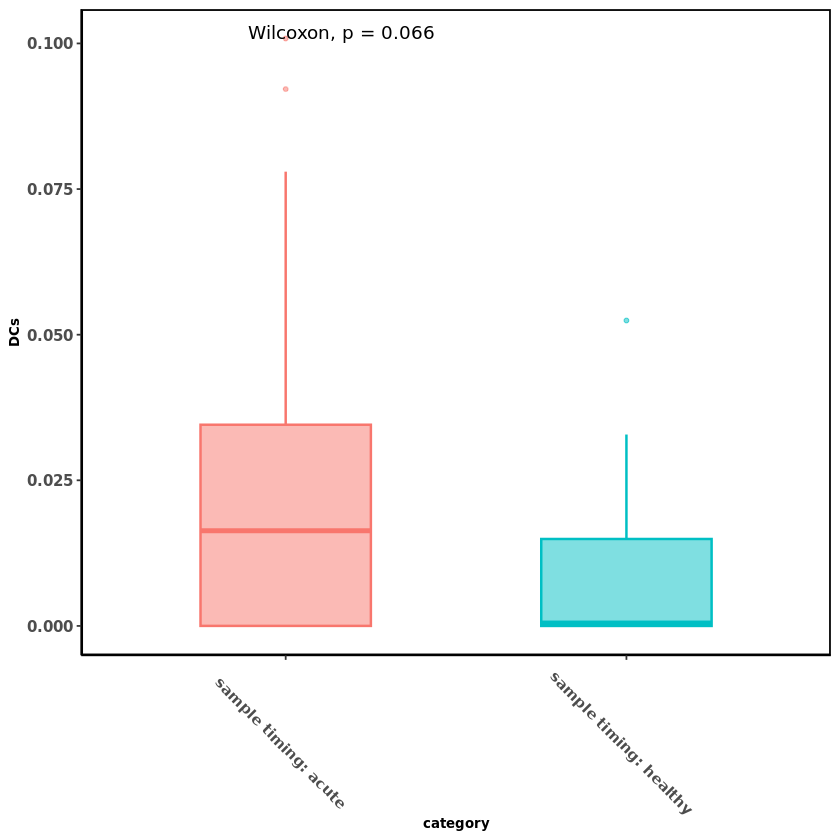

In [12]:
library(ggplot2)
library(ggpubr)

prd_df<- readRDS("~/ReCIDE/应用_前二_新_inter/COVID19/music/MuSiC_prd_df.rds")
# prd_df['B',]=prd_df[2,]+prd_df[3,]+prd_df[4,]
prd_df=prd_df[,sort(colnames(prd_df))]
prd_df['DCs',]=prd_df['DC',]+prd_df['pDC',]

metadata<- readRDS("~/ReCIDE/应用_前二_新_inter/COVID19/bulkdata/metadata_query.rds")
metadata=metadata[sort(row.names(metadata)),]


all(row.names(metadata)==colnames(prd_df))

plot_data=as.data.frame(t(prd_df))

plot_data[,'category']=metadata[,'characteristics_ch1.3']
# 
# patient_names=row.names(metadata[metadata[,"included in case -control study:ch1"]=='yes',])
# plot_data=plot_data[patient_names,]

plot_data=subset(plot_data,category %in% c("sample timing: healthy",
                                           "sample timing: acute"))
# # # 
# # 
# plot_data[,'category']=factor(plot_data[,'category'],levels = c("sample timing: healthy",
#                                                                 "sample timing: acute"))


ggplot(plot_data, aes(x= category, y=DCs,fill=category)) + 
  geom_boxplot(aes(color = category),#这里的fill如果不设就是空心的
               size = .7, alpha = .5, outlier.size = 1,
               position = position_dodge(width = 0.5), width = 0.5) +
  # position_dodge是箱子间距离  width是箱宽
  # geom_boxplot(data=subset(plot_data, methods %in% 'empty'), width = .5) +
  theme_classic() +
  theme(
    axis.text.x = element_text(size = 9, face = "bold", angle = -45),
    axis.text.y = element_text(size = 9, face = "bold"),
    # axis.text.x = element_blank(),
    # axis.text.y = element_blank(),
    axis.title = element_text(size = 8, face = "bold"),
    plot.title = element_text(size = 8, face = "bold", hjust = 0.5),
    plot.subtitle = element_text(size = 10, face = "bold", hjust = 0.5),
    panel.border = element_rect(fill=NA,color="black", size=1, linetype="solid"),
    legend.position = 'none'
    # axis.title = element_text(size = 8)
  )+
  stat_compare_means()